**CONFRONTO TRA ALGORITMI PER LA RICERCA DELLE RADICI DI UNA FUNZIONE**

Per effettuare il confronto sono stati implementati i seguenti algorirmi:
- Metodo delle Bisezioni Successice
- Metodo di Newton
- Metodo delle Secanti
- Metodo delle Corde

Questi ultimi due sono delle varianti al metodo di Newton

Considerata la funzione f(x) = x^2 - 11, vogliamo studiare come si comportanto i diversi metodi al calcolatore.
Fissata la tolleranza calcolata dal metodo epsilon_machine() e un numero di iterazioni massimo pari a Kmax = 35 per assicurarci che il calcolo non diverga

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def epsilon_machine():
    eps = 1.0
    while eps + 1 > 1:
        eps/=2
    eps *= 2
    
    return eps

In [3]:
def f(x):
    return x ** 2 - 11

In [4]:
def df(x):
    return 2 * x

In [5]:
def metodo_Bisezioni_Successive(a: float, b: float, tolleranza: float, x_reale: float, fun):
    # Verifica presenza di radici
    fa = fun(a)
    fb = fun(b)

    c = None

    if fa * fb > 0:
        print('Errore: non garantita radice in [%f; %f]' % (a, b))
    else:
        n = math.ceil(math.log2((b - a) / tolleranza)) - 1
        err = np.zeros(n + 1)  # def dell'errore

        for k in range(n + 1):
            c = (a + b) / 2
            fc = fun(c)

            err[k] = abs(x_reale - c)
            if fa * fc < 0:
                b = c
            else:
                a = c
                fa = fc

    return c, err

In [6]:
def metodo_Newton(x0: float, tolleranza: float, kmax: int, x_reale: float, fun, dfun):
    fx0 = fun(x0)
    dfx0 = dfun(x0)
    err = []

    iterazioni = 0
    stop = 0

    while not stop and iterazioni < kmax:
        x1 = x0 - fx0 / dfx0
        fx1 = fun(x1)

        stop = abs(fx1) + abs(x1 - x0) / abs(x1) < tolleranza / 5

        err.append(abs(x_reale - x1))

        iterazioni += 1

        if not stop:
            x0 = x1
            fx0 = fx1
            dfx0 = dfun(x0)

    if not stop:
        print("Accuratezza del metodo raggiunta in %d iterazioni" % (int(iterazioni)))

    return x1, err

In [7]:
def metodo_Secanti(x0, x1, tolleranza, k_max, x_reale: float, fun):
    fx0 = fun(x0)
    fx1 = fun(x1)

    err = []

    iterazioni = 0
    stop = 0

    while not stop and iterazioni < k_max:
        x2 = x1 - ((fx1 * (x1 - x0)) / (fx1 - fx0))
        fx2 = fun(x2)

        stop = abs(fx2) + abs(x2 - x1) / abs(x2) < tolleranza / 5

        err.append(abs(x_reale - x2))

        iterazioni += 1

        if not stop:
            x0 = x1
            fx0 = fx1
            x1 = x2
            fx1 = fx2

    if not stop:
        print("Accuratezza del metodo raggiunta in %d iterazioni" % (int(iterazioni)))

    return x1, err

In [8]:
def metodo_Corde(x0: float, m, tolleranza, kmax, x_reale: float, fun):
    fx0 = fun(x0)
    err = []

    iterazioni = 0
    stop = 0

    while not stop and iterazioni < kmax:
        x1 = x0 - fx0 / m
        fx1 = fun(x1)

        stop = abs(fx1) + abs(x1 - x0) / abs(x1) < tolleranza / 5
        err.append(abs(x_reale - x1))

        iterazioni += 1

        if not stop:
            x0 = x1
            fx0 = fx1

    if not stop:
        print("Accuratezza del metodo raggiunta in %d iterazioni" % (int(iterazioni)))

        return x1, err

In [9]:
def vettore_standard(err, l_max):
    v = np.array([i - i for i in range(l_max)], dtype=float)

    for i in range(len(err)):
        v[i] = err[i]
    return np.array(v)

In [10]:
def test_ricerca_radici():
    # soluzione reale del problema

    x_reale = math.sqrt(11)

    # numero massimo iterazioni
    k_max = 35

    # tolleranza per l'arresto del criterio

    tolleranza = epsilon_machine()

    # estremi dell'intervallo
    a = -2
    b = 4

    # ora calcolo la soluzione e il vettore degli errori per il metodo delle Bisezioni Successive
    sol_BS, err_BS = metodo_Bisezioni_Successive(a, b, tolleranza, x_reale, f)

    # punto iniziale del metodo di newton
    x0 = 3

    sol_New, err_New = metodo_Newton(x0, tolleranza, k_max, x_reale, f, df)

    # punti iniziali del metodo delle secanti

    x0 = 1
    x1 = 3

    sol_Sec, err_Sec = metodo_Secanti(x0, x1, tolleranza, k_max, x_reale, f)

    # punti iniziali del metodo Corde
    x0 = 0
    m = 4

    sol_Corde, err_Corde = metodo_Corde(x0, m, tolleranza, k_max, x_reale, f)

    len_max_err = max(len(err_BS), len(err_New), len(err_Sec), len(err_Corde))

    err_BS = vettore_standard(err_BS, len_max_err)
    err_New = vettore_standard(err_New, len_max_err)
    err_Sec = vettore_standard(err_Sec, len_max_err)
    err_Corde = vettore_standard(err_Corde, len_max_err)

    plt.plot(1)
    plt.semilogy(range(len_max_err), err_BS, "orange", label="Metodo delle Bisezioni Successive")
    plt.semilogy(range(len_max_err), err_New, "green", label="Metodo di Newton")
    plt.semilogy(range(len_max_err), err_Sec, "red", label="Metodo delle Secanti")
    plt.semilogy(range(len_max_err), err_Corde, "blue", label="Metodo delle Corde")

    plt.legend()
    plt.xlabel("Nro. Iterazioni")
    plt.ylabel('Errore')
    plt.show()

**CONFRONTI IN BASE ALLA CONVERGENZA**

Il grafico mostra la velocità di convergenza dei vari metodi per la ricerca delle radici di una funzione.

Come prima cosa notiamo dal grafico che il metodo che converge più lentamente è quello delle Bisezioni Successive rispetto al più rapido che è il metodo di Newton

L'osservazione principale che si può fare riguarda la convergenza più rapida di tutti gli altri metodi rispetto al metodo delle bisezioni successive, in effetti i metodi piùù rapidi hanno criteri più stringenti come ad esempio la conoscenza a priori della derivata delle funzione (metodo di Newton) o un punto iniziale vicino alla soluzione per gli altri metodi

Accuratezza del metodo raggiunta in 35 iterazioni


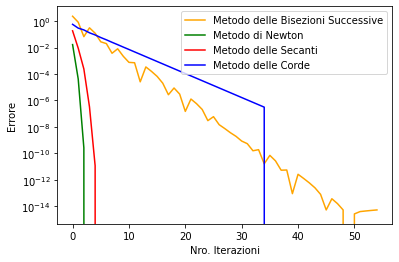

In [33]:
test_ricerca_radici()
